78000 people die every year in the UK from smoking related illness. has been identified as the single biggest cause of inequality in death rates between rich and poor in the UK. The recent 10 year plan make ambiotious statements about prevention and a key part of any prevention strategy should be reduction in smoking rates.

Nictoine replacement therapy (NRT) is an evidence based treatment for supprting people to stop smoking.

Here we take a look at Trends and varaiation with nicotine replacement on FP10 prescription. It will not give us a complete picture as it may be suppplied via other means such as a pharmacy service or purchased by a patient so will not give a complete picture.

In [1]:
import pandas as pd
import numpy as np
from ebmdatalab import bq
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
sql = '''SELECT
  extract(year from month) AS year,
  month,
  pct,
  bnf_code AS bnfcode,
  bnf_name AS bnfname,
  ccg.org_type AS org_type,
  SUM(items) AS total_items,
  SUM(quantity) AS total_qty,
  SUM(actual_cost) AS actual_cost
FROM
  ebmdatalab.hscic.normalised_prescribing_standard AS presc
JOIN
  hscic.ccgs AS ccg #this joins to our CCG organisational data
ON
  presc.pct = ccg.code
WHERE
 bnf_code like "0410020B0%" ##nictotine
  or bnf_code like "0410020D0%" ##nicotine bitartrate 
GROUP BY
  year,
  month,
  pct,
  bnf_code,
  bnf_name,
  org_type'''
    
df_nrt = bq.cached_read(sql, csv_path='df_nicotine.csv', use_cache=True)  # add `use_cache=False` to override
df_nrt.head() ##nrt is nicotine replacement therapy 

,year,month,pct,bnfcode,bnfname,org_type,total_items,total_qty,actual_cost
0,2011,2011-09-01,5PN,0410020D0AAACAC,Buprenorphine_Tab Subling 400mcg S/F,PCT,2,67,19.28
1,2011,2011-02-01,04Q,0410020D0AAACAC,Buprenorphine_Tab Subling 400mcg S/F,CCG,4,105,23.74
2,2011,2011-09-01,99F,0410020D0AAACAC,Buprenorphine_Tab Subling 400mcg S/F,CCG,1,50,14.25
3,2011,2011-02-01,99G,0410020D0AAACAC,Buprenorphine_Tab Subling 400mcg S/F,CCG,22,703,163.41
4,2011,2011-08-01,209,0410020D0AAACAC,Buprenorphine_Tab Subling 400mcg S/F,Unknown,154,4385,1233.03


Oddly Buprenorphine is returned in the results. In 2011 0410020D0AAACAC =	Buprenorphine_Tab Subling 400mcg S/F, whereas today the 0410020D0AAACAC = 


In [3]:
## ensuring the format is consistent for pounds and pence
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
### grouping the total cost by year
nrttotalcost = df_nrt.groupby(['year'])['actual_cost'].sum()
nrttotalcost

year
2010     108365.72
2011    4440615.95
2012   26590852.90
2013   23420544.40
2014   18176398.94
2015   14893081.96
2016   12851566.94
2017   11645468.49
2018    9980374.79
2019    1731093.46
Name: actual_cost, dtype: float64

In [5]:
### grouping the total items by year
nrttotalitems = df_nrt.groupby(['year'])['total_items'].sum()
nrttotalitems

year
2010      13347
2011     252309
2012    1383675
2013    1119279
2014     834836
2015     663182
2016     564923
2017     492854
2018     401107
2019      69578
Name: total_items, dtype: int64

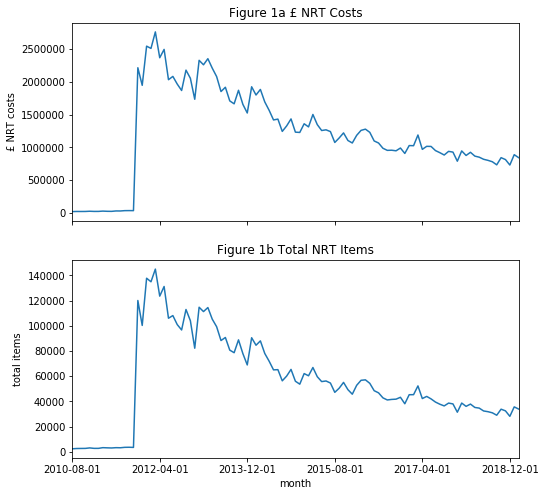

In [6]:
f = plt.figure(figsize=(8, 8))
layout = gridspec.GridSpec(2, 1, figure=f)
top_plot = plt.subplot(layout[0])
bottom_plot = plt.subplot(layout[1], sharex=top_plot)  # Share the Y axis 


ax = df_nrt.groupby('month').sum()['actual_cost'].plot(ax=top_plot)
### plt.axvline('2013-14-01',color='r',linestyle='--', label='NHS Changes') 
ax.set_ylabel('£ NRT costs')
ax.set_title('Figure 1a £ NRT Costs')
ax = df_nrt.groupby('month').sum()['total_items'].plot(ax=bottom_plot)
ax.set_ylabel('total items')
ax.set_title('Figure 1b Total NRT Items')
## plt.axvline('2013-14-01',color='r',linestyle='--', label='NHS Changes') WHY DOESN'T THIS PLOT?!
plt.show()

There is a spike in late 2011 but probably reflects some BNF coding change as discussed above.

More broadly the amount of NRT being prescribed on FP10 is declining which may reflect
- a) shifting to nonFP10 supply routes
- b) decreasing investment or budgetary cuts in public health (see other analysis)
- c) declining use of NRT as smoking rate continues to decline and proliferation of e-cigarettes

It is probalably a combination of all three.


